In [1]:
#conda install -c anaconda scikit-image

In [3]:
import cv2
import os
from PIL import Image 
from matplotlib import pyplot as plt
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import random

In [2]:
dir_path = './Documents/Python_Scripts/dataset/NASAdata/'
minmaxscaler = MinMaxScaler()

In [12]:
# Using OpenCV to compare two images 
#Works well with images of different dimensions
def orb_sim(img1, img2):
  # SIFT is no longer available in cv2 so using ORB
    orb = cv2.ORB_create()

      # detect keypoints and descriptors
    kp_a, desc_a = orb.detectAndCompute(img1, None)
    kp_b, desc_b = orb.detectAndCompute(img2, None)

      # define the bruteforce matcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

      #perform matches. 
    matches = bf.match(desc_a, desc_b)
      #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
    similar_regions = [i for i in matches if i.distance < 50]  
    if len(matches) == 0:
        return 0
    return len(similar_regions) / len(matches)

In [13]:
path = './Documents/Python_Scripts/dataset/NASAdb/'

img1 = cv2.imread(path+'BSE_Image.jpg', 1)  # 714 x 901 pixels
img2 = cv2.imread(path+'BSE_noisy.jpg', 1)  # 714 x 901 pixels
#img2 = cv2.resize(img2,(img1.shape[0],img1.shape[1]))

print(img1.shape, img2.shape)
img3 = cv2.imread(path+'BSE_transl.jpg', 0)  # 203 x 256 pixels
img4 = cv2.imread(path+'Neuron.jpg', 0)  # 203 x 256 pixels
print(img3.shape, img4.shape)

orb_similarity = orb_sim(img2, img1)  #1.0 means identical. Lower = not similar

print("Similarity 1 using ORB is: ", orb_similarity)

orb_similarity = orb_sim(img1, img1)  #1.0 means identical. Lower = not similar
print("Similarity  of the same image ", orb_similarity)


(751, 1000, 3) (714, 901, 3)
(714, 901) (800, 800)
Similarity 1 using ORB is:  0.7649122807017544
Similarity  of the same image  1.0


In [15]:
# Given a folder of images, method to compare images between them
def set_similarity_img(dir_path):
    list_imgs = []
    list_pred = []
    for path in os.listdir(dir_path):
        #image = cv2.imread(dataset_folder+path,1)
        list_imgs.append(dir_path+path)

    for i in range(len(list_imgs)):
        image1 = cv2.imread(list_imgs[i],1)
        for j in range(i,len(list_imgs)) :
            image2 = cv2.imread(list_imgs[j],1)
            orb_similarity = orb_sim(image1, image2)  #1.0 means identical. Lower = not similar
            k = (int) (orb_similarity > 0.5)
            list_pred.append([list_imgs[i].split('/')[-1],list_imgs[j].split('/')[-1],k])
            
    return list_pred

In [33]:
list_of_set = set_similarity_img(dir_path)

In [34]:
len(list_of_set)

1035

In [35]:
# converting list into DataFrame
df = pd.DataFrame(list_of_set, columns=['image1', 'image2', 'similarity'])

In [66]:
df.head()

,image1,image2,similarity
0,img_0.jpg,img_0.jpg,1
1,img_0.jpg,img_1.jpg,0
2,img_0.jpg,img_10.jpg,0
3,img_0.jpg,img_11.jpg,0
4,img_0.jpg,img_12.jpg,0


In [36]:

df.to_csv('C:/Users/kpodj/OneDrive/Documents/Python_Scripts/dataset/dataset_sim.csv',index=False)

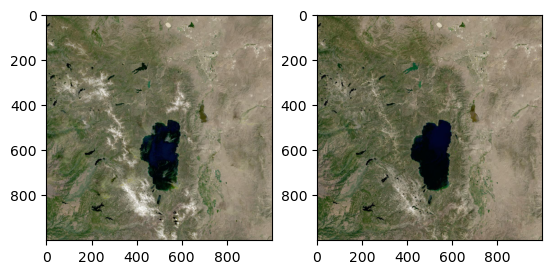

In [25]:
plt.subplot(121)
plt.imshow(cv2.cvtColor(img01, cv2.COLOR_RGB2BGR))
plt.subplot(122)
plt.imshow(cv2.cvtColor(img00, cv2.COLOR_RGB2BGR))

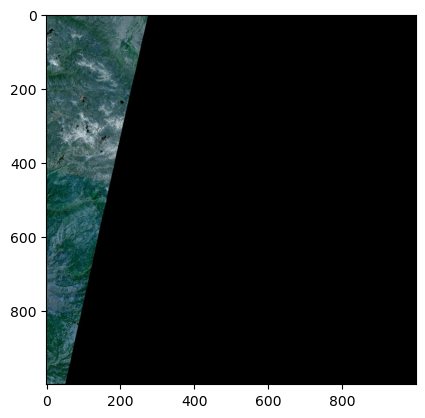

In [8]:
plt.imshow(cv2.imread(tst,1))

In [32]:
pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ----------- --------------------------- 71.7/235.6 kB 558.5 kB/s eta 0:00:01
   ----------- --------------------------- 71.7/235.6 kB 558.5 kB/s eta 0:00:01
   ------------------------------- ------ 194.6/235.6 kB 784.3 kB/s eta 0:00:01
   -------------------------------------- 235.6/235.6 kB 847.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
from collections import Counter
from imblearn.combine import SMOTEENN

In [5]:
df = pd.read_csv('C:/Users/kpodj/OneDrive/Documents/Python_Scripts/dataset/dataset_sim.csv')

In [6]:
df.head()

,image1,image2,similarity
0,img_0.jpg,img_0.jpg,1
1,img_0.jpg,img_1.jpg,0
2,img_0.jpg,img_10.jpg,0
3,img_0.jpg,img_11.jpg,0
4,img_0.jpg,img_12.jpg,0


In [7]:
X = df[['image1','image2']]

In [8]:
X

,image1,image2
0,img_0.jpg,img_0.jpg
1,img_0.jpg,img_1.jpg
2,img_0.jpg,img_10.jpg
3,img_0.jpg,img_11.jpg
4,img_0.jpg,img_12.jpg
...,...,...
1030,img_7.jpg,img_8.jpg
1031,img_7.jpg,img_9.jpg
1032,img_8.jpg,img_8.jpg
1033,img_8.jpg,img_9.jpg


In [9]:
y = df[['similarity']]

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [33]:
label_encoder.fit_transform(X.iloc[:,0])

array([ 0,  0,  0, ..., 43, 43, 44])

In [44]:
# Fit the LabelEncoder to the categorical labels and transform them
numerical_X1 = label_encoder.fit_transform(X.iloc[:,0])

In [45]:
numerical_X2 = label_encoder.transform(X.iloc[:,1])

In [40]:
numerical_X1.shape

(1035,)

In [46]:
numerical_X1

array([ 0,  0,  0, ..., 43, 43, 44])

In [50]:
type(numerical_X1)

numpy.ndarray

In [51]:
df2 = pd.DataFrame(numerical_X1, columns=['image1'])

In [52]:
df2['image2'] = pd.DataFrame(numerical_X2, columns=['image2'])

In [60]:
sample = SMOTEENN(sampling_strategy=1)
# fit and apply the transform
X_over, y_over = sample.fit_resample(df2.values, y.values)
# summarize class distribution
print(Counter(y_over))

Counter({1: 639, 0: 515})


In [65]:
X_over[0]

array([0, 2])

In [66]:
label_encoder.inverse_transform(X_over[:,0])

array(['img_0.jpg', 'img_0.jpg', 'img_0.jpg', ..., 'img_18.jpg',
       'img_2.jpg', 'img_11.jpg'], dtype=object)